# Tutorial: OrdNMF

In [1]:
import sys
sys.path.append("model/OrdNMF")

import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt

from OrdNMF import OrdNMF
from OrdNMF import Ord_generate

In [2]:
U = 100
I = 200
K = 3
b = np.array([1.,5.,10.,20.,50.])
V = len(b)

np.random.seed(0)
W = np.random.gamma(1.,1.,(U,K))
H = np.random.gamma(1.,1.,(I,K))
L = W.dot(H.T)
Ya = Ord_generate(L,1./b)
Y = sparse.csr_matrix(Ya)

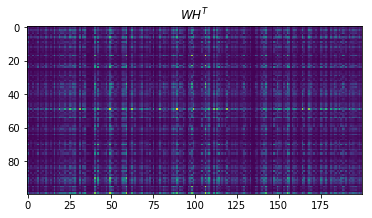

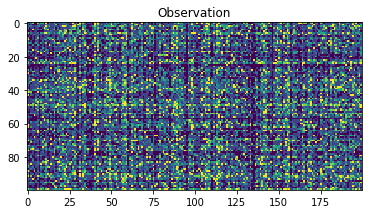

In [3]:
plt.figure()
plt.title(r'$WH^T$')
plt.imshow(L)
plt.figure()
plt.title('Observation')
plt.imshow(Ya)

In [4]:
model = OrdNMF(K=K)
model.fit(Y, T=V, precision=10**(-5), seed=0, verbose=True, save=False)

ITERATION #0
	Updates: time=0.01
	Rate:inf
ITERATION #1
	Updates: time=0.03
	Rate:0.010563612991477697
ITERATION #2
	Updates: time=0.01
	Rate:0.0039449155118828775
ITERATION #3
	Updates: time=0.01
	Rate:0.0020529398118788802
ITERATION #4
	Updates: time=0.02
	Rate:0.0012533027801231323
ITERATION #5
	Updates: time=0.02
	Rate:0.0008385588149277304
ITERATION #6
	Updates: time=0.01
	Rate:0.0005955694361808399
ITERATION #7
	Updates: time=0.01
	Rate:0.00044112667075438353
ITERATION #8
	Updates: time=0.01
	Rate:0.00033699505172745585
ITERATION #9
	Updates: time=0.02
	Rate:0.00026358740750216723
ITERATION #10
	Updates: time=0.02
	Rate:0.00021003193212344753
ITERATION #11
	Updates: time=0.01
	Rate:0.0001698956207488807
ITERATION #12
	Updates: time=0.01
	Rate:0.0001391646446285062
ITERATION #13
	Updates: time=0.01
	Rate:0.00011522092074727211
ITERATION #14
	Updates: time=0.02
	Rate:9.629236443799296e-05
ITERATION #15
	Updates: time=0.01
	Rate:8.114214858228244e-05
ITERATION #16
	Updates: time=0.0

In [5]:
Ew = model.Ew
Eh = model.Eh
El = Ew.dot(Eh.T)

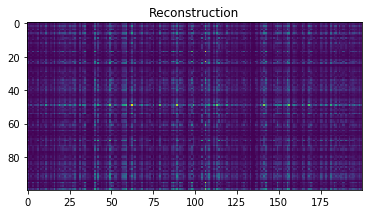

In [6]:
plt.figure()
plt.title('Reconstruction')
plt.imshow(El)

In [7]:
b_est = 1./model.theta[:-1]
print(b_est)

[ 1.03923711  4.93314492  9.8572592  19.77462303 48.56120106]
